In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from util_model import apply_models

In [2]:
# Create the dataframe
best_feat = pd.read_csv('best_features.csv')
best_feat

,Age,Gender,Ethnicity,SocioeconomicStatus,BMI,Smoking,DietQuality,FamilyHistoryDiabetes,GestationalDiabetes,PolycysticOvarySyndrome,...,FrequentUrination,ExcessiveThirst,UnexplainedWeightLoss,FatigueLevels,BlurredVision,TinglingHandsFeet,QualityOfLifeScore,MedicationAdherence,HealthLiteracy,Diagnosis
0,44,0,1,2,32.99,1,4.90,1,1,0,...,0,0,0,9.53,0,1,73.77,4.49,7.21,1
1,51,1,0,1,39.92,0,8.94,0,0,0,...,0,0,0,0.12,0,0,91.45,5.96,5.02,1
2,89,1,0,1,19.78,0,7.72,1,0,0,...,0,0,0,9.64,0,0,54.49,8.95,7.03,0
3,21,1,1,1,32.38,1,4.80,1,1,0,...,0,0,0,3.40,0,0,77.87,3.12,4.72,0
4,27,1,0,1,16.81,0,2.53,0,0,0,...,0,0,0,2.92,0,0,37.73,6.98,7.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,37,0,0,2,20.81,0,8.34,0,0,0,...,0,1,0,3.69,1,1,88.12,3.85,8.81,0
1875,80,1,0,2,27.69,0,3.03,1,1,0,...,0,0,0,4.23,0,0,77.13,5.22,0.92,1
1876,38,1,0,0,35.64,0,2.66,0,0,0,...,0,0,0,1.17,0,0,13.15,3.38,3.02,1
1877,43,0,1,2,32.42,0,8.74,1,0,1,...,0,0,0,9.73,0,0,54.37,0.01,4.91,1


In [3]:
# Define the feature matrix
X = best_feat.drop(["Diagnosis"],axis =1)
y = best_feat["Diagnosis"]

### Accuracy Score Comparison

c:\Users\lucas\anaconda3\envs\activities\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lucas\anaconda3\envs\activities\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:11:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 609, number of negative: 894
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3837
[LightGBM] [Info] Number of data points in the train set: 1503, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.405190 -> initscore=-0.383888
[LightGBM] [Info] Start training from score -0.383888
Learning rate set to 0.01226
0:	learn: 0.6809763	total: 164ms	remaining: 2m 44s
1:	learn: 0.6684720	total: 175ms	remaining: 1m 27s
2:	learn: 0.6576420	total: 180ms	remaining: 59.7s
3:	learn: 0.6456288	total: 188ms	remaining: 46.9s
4:	learn: 0.6354516	total: 194ms	remaining: 38.7s
5:	learn: 0.6255075	total: 202ms	remaining: 33.4s
6:	learn: 0.6145230	total: 207ms	remaining: 29.4s
7:	learn: 0.6046610	total: 214ms	remaining: 26.5s
8:	learn: 0.5940

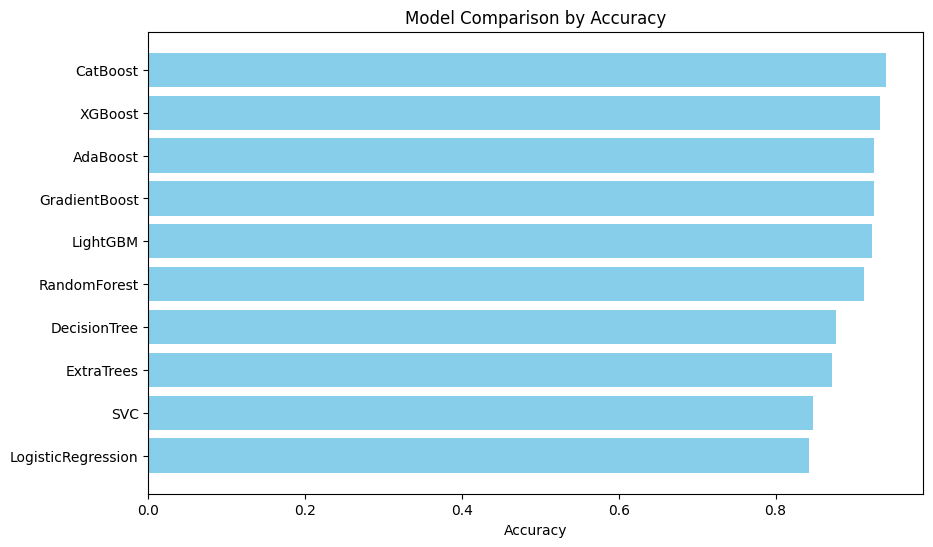

In [4]:
# Use the apply_models function to compare the accuracy scores of the models
results, X_test, y_test = apply_models(X, y)  # Capture the tuple: results, X_test, y_test

# Extract accuracies and sort models by accuracy in descending order
sorted_results = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)
sorted_model_names = [model_name for model_name, _ in sorted_results]
sorted_accuracies = [metrics['accuracy'] for _, metrics in sorted_results]

# Plot accuracies
def plot_accuracy(models, accuracies):
    plt.figure(figsize=(10, 6))
    plt.barh(models, accuracies, color='royalblue')  # models are passed in sorted order
    plt.xlabel('Accuracy')
    plt.title('Model Comparison by Accuracy')
    plt.gca().invert_yaxis()  # Ensures the highest accuracy is at the top
    plt.show()

# Call the function to plot accuracy with sorted models and accuracies
plot_accuracy(sorted_model_names, sorted_accuracies)



### Confusion Matrix Heatmap

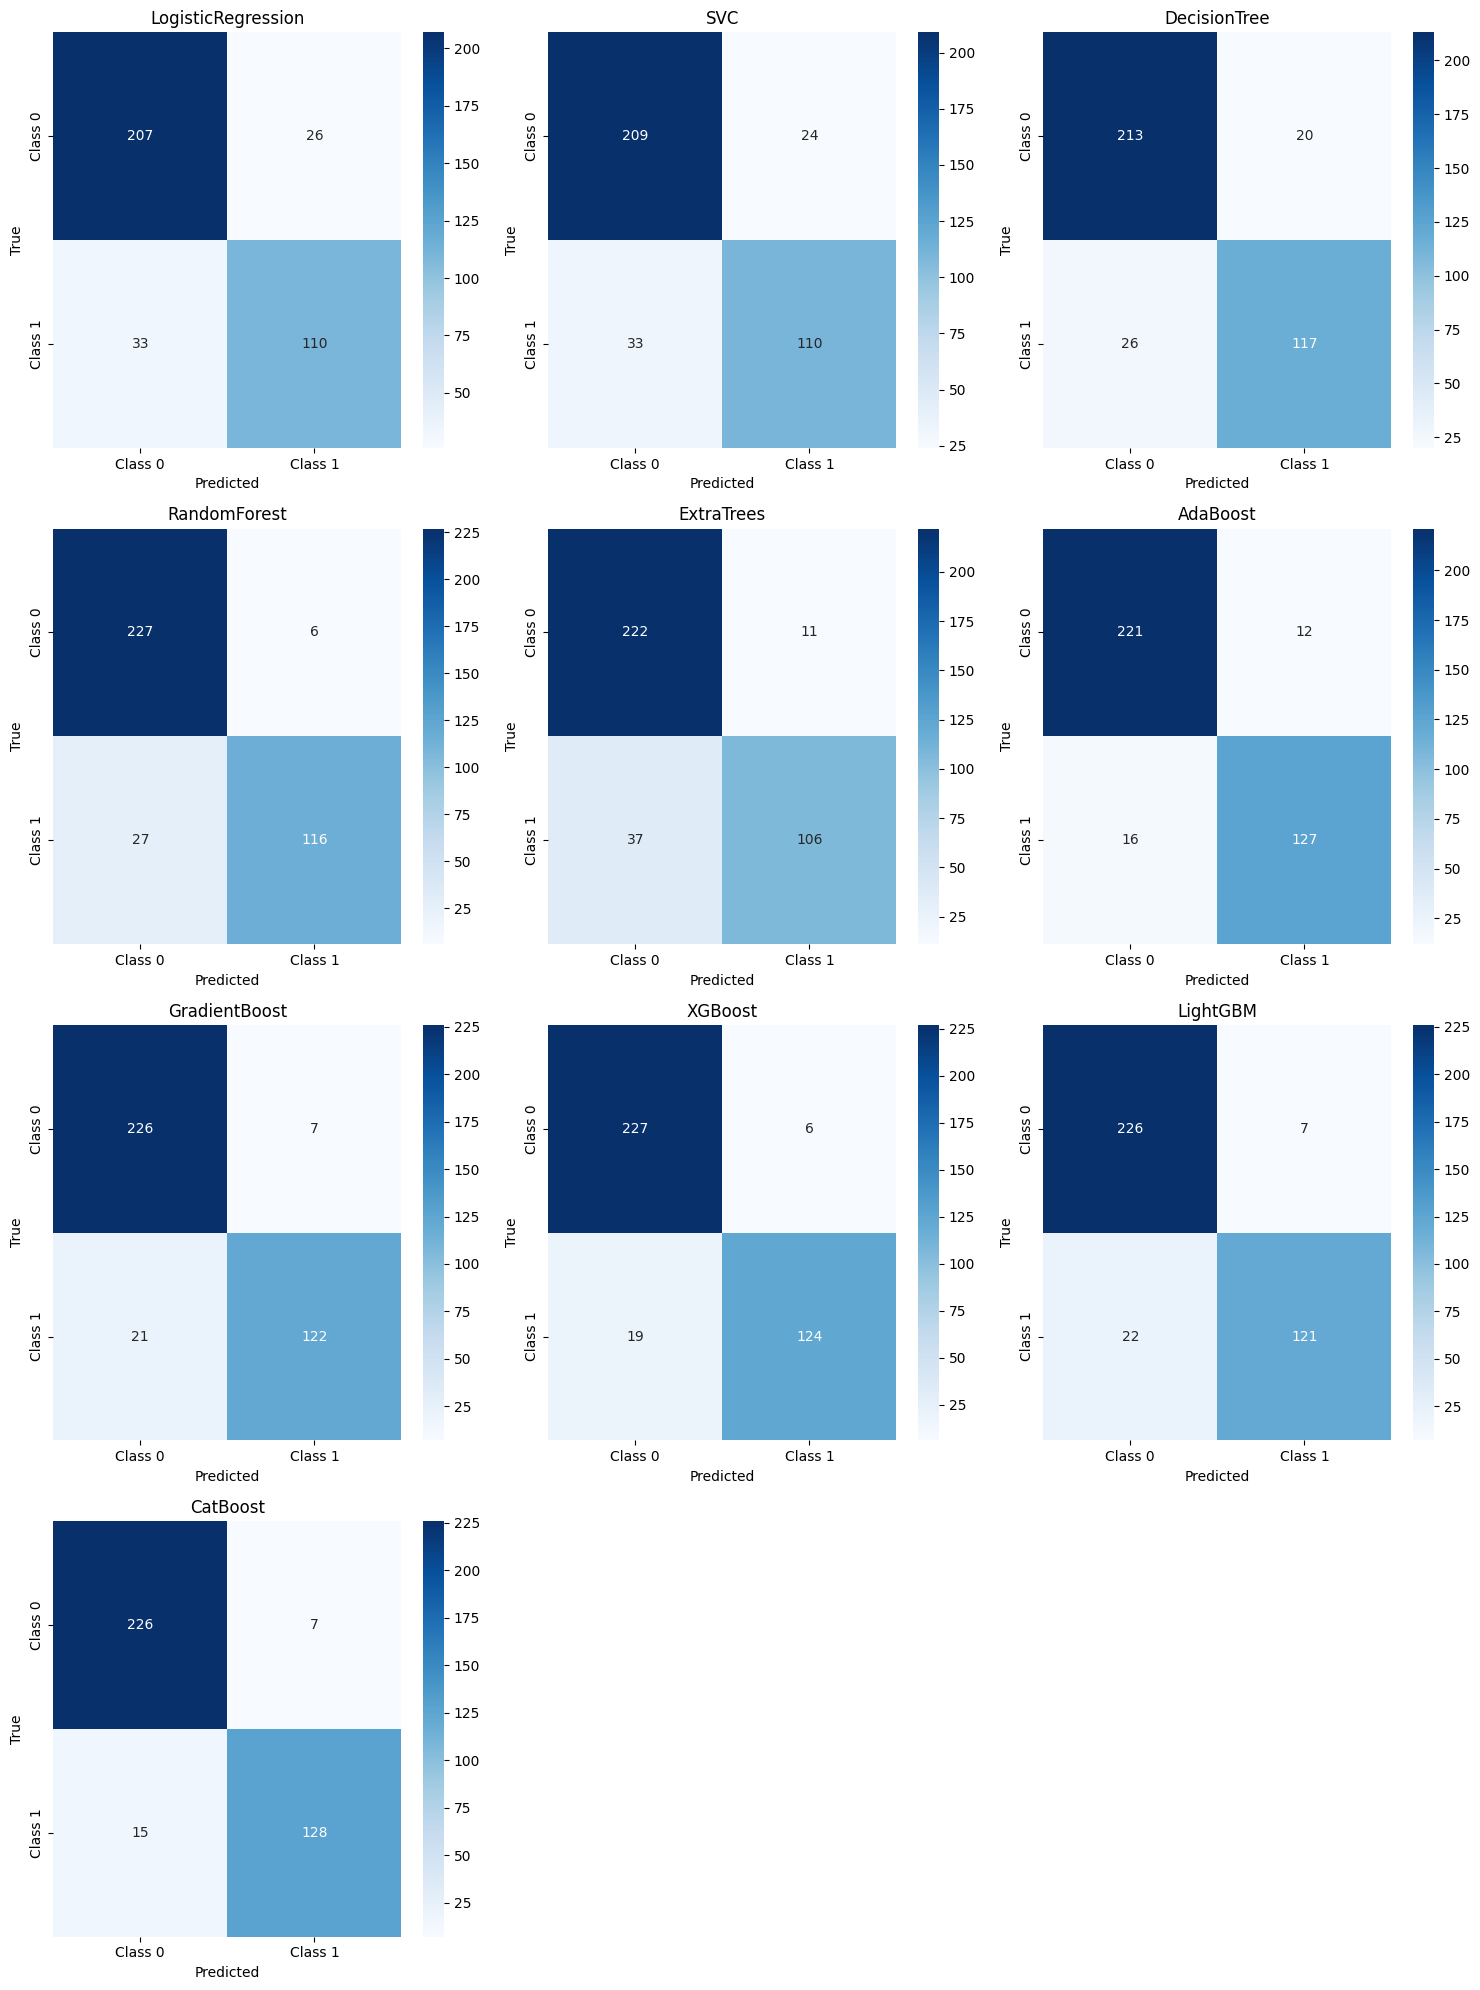

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_all_confusion_matrices(results, class_labels):
    """
    Plots confusion matrices for all models in a single chart (grid layout).
    
    Args:
        results (dict): Dictionary of model metrics, including confusion matrices.
        class_labels (list): List of class labels.
    """
    n_models = len(results)
    ncols = min(n_models, 3)  # Number of columns (max 3 per row)
    nrows = (n_models + ncols - 1) // ncols  # Calculate number of rows needed
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    for i, (model_name, metrics) in enumerate(results.items()):
        conf_matrix = metrics['confusion_matrix']
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                    xticklabels=class_labels, yticklabels=class_labels, ax=axes[i])
        axes[i].set_title(f'{model_name}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('True')

    # Remove any empty subplots if there are less models than grid spaces
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage assuming your confusion matrices are stored in the results dictionary
class_labels = ['Class 0', 'Class 1']  # Modify based on your dataset's classes
plot_all_confusion_matrices(results, class_labels)


### Precision, Recall and F1 Score

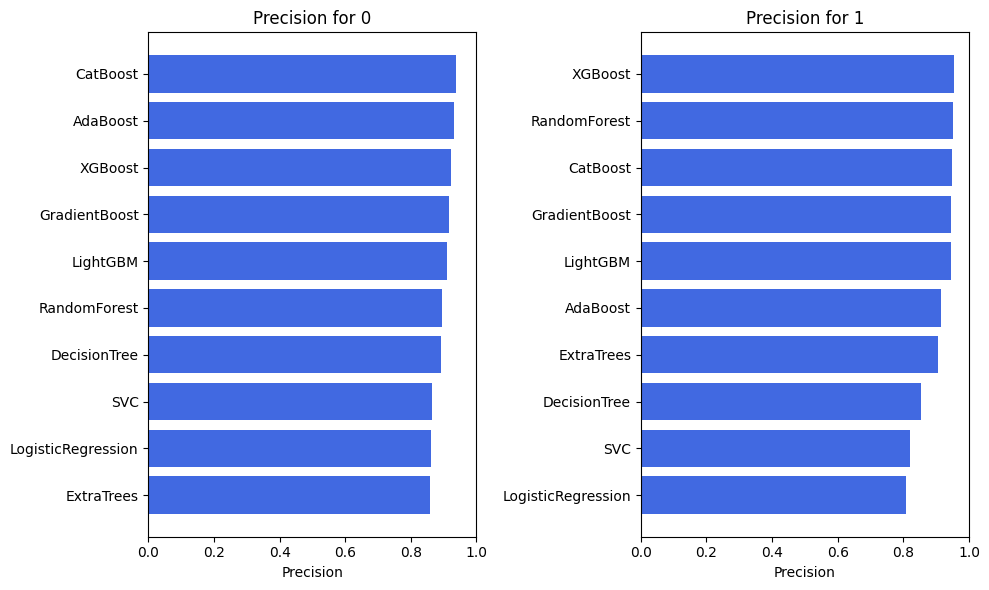

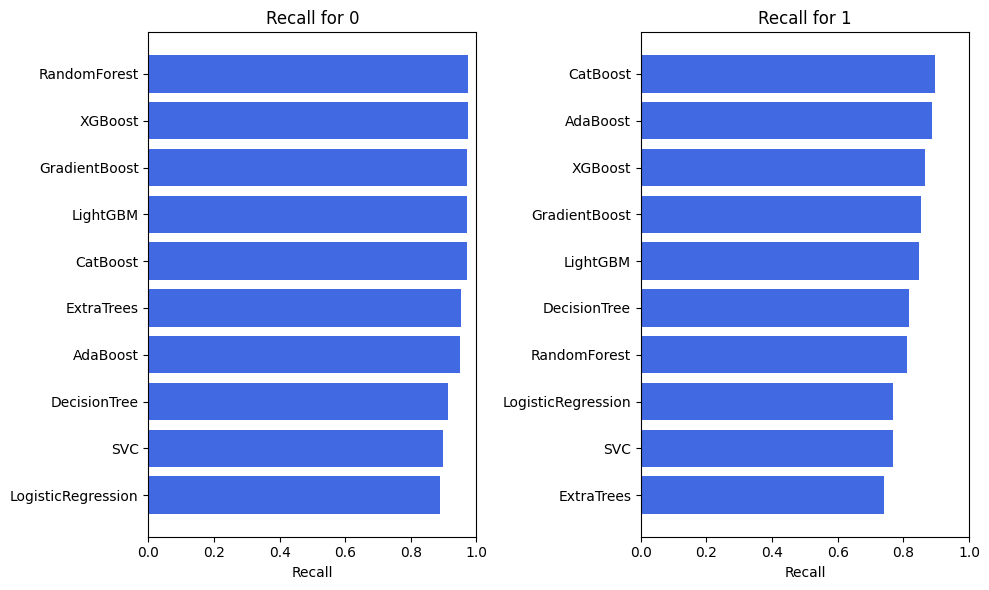

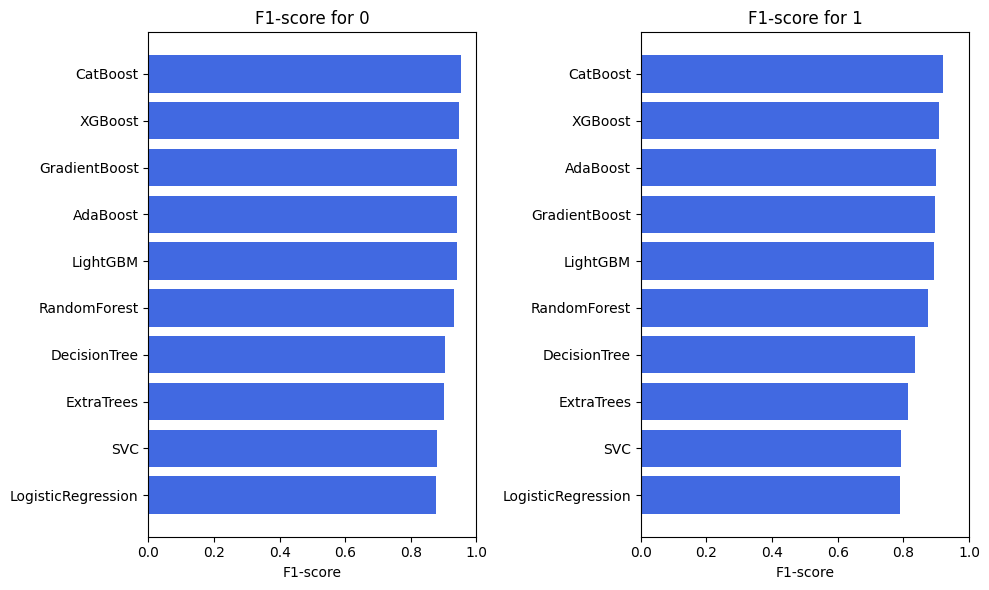

In [6]:

import matplotlib.pyplot as plt
import numpy as np

def plot_precision_recall_f1(results, metric='precision', class_labels=['Class 0', 'Class 1']):
    """
    Plots and ranks Precision, Recall, or F1-Score for all models in descending order.
    
    Args:
        results (dict): Dictionary of model metrics, including classification reports.
        metric (str): The metric to plot ('precision', 'recall', or 'f1-score').
        class_labels (list): List of class labels.
    """
    n_classes = len(class_labels)
    n_models = len(results)
    
    # Initialize a figure for subplots
    fig, axes = plt.subplots(1, n_classes, figsize=(5 * n_classes, 6))
    
    if n_classes == 1:  # Handle single-class case
        axes = [axes]

    # Loop through each class and plot for all models
    for i, class_label in enumerate(class_labels):
        class_metric_values = []
        model_names = []

        # Collect model metrics
        for model_name, metrics in results.items():
            # Extract the precision, recall, or f1-score for each class
            class_metric = metrics['classification_report'][class_label][metric]
            class_metric_values.append((model_name, class_metric))
        
        # Sort the models by the selected metric (Precision, Recall, or F1-score)
        class_metric_values.sort(key=lambda x: x[1], reverse=True)

        # Separate sorted model names and metric values
        sorted_model_names = [x[0] for x in class_metric_values]
        sorted_class_metric_values = [x[1] for x in class_metric_values]
        
        # Create a bar plot for each class
        axes[i].barh(sorted_model_names, sorted_class_metric_values, color='royalblue')
        axes[i].set_title(f'{metric.capitalize()} for {class_label}')
        axes[i].set_xlabel(f'{metric.capitalize()}')
        axes[i].set_xlim([0, 1])
        axes[i].invert_yaxis()  # Ensures the highest value is at the top

    plt.tight_layout()
    plt.show()

# Example usage: Comparing Precision, Recall, and F1-score
class_labels = ['0', '1']  # Modify based on the labels in your classification report

# Plot precision comparison for all models
plot_precision_recall_f1(results, metric='precision', class_labels=class_labels)

# Plot recall comparison for all models
plot_precision_recall_f1(results, metric='recall', class_labels=class_labels)

# Plot F1-score comparison for all models
plot_precision_recall_f1(results, metric='f1-score', class_labels=class_labels)



### ROC Curve Comparison

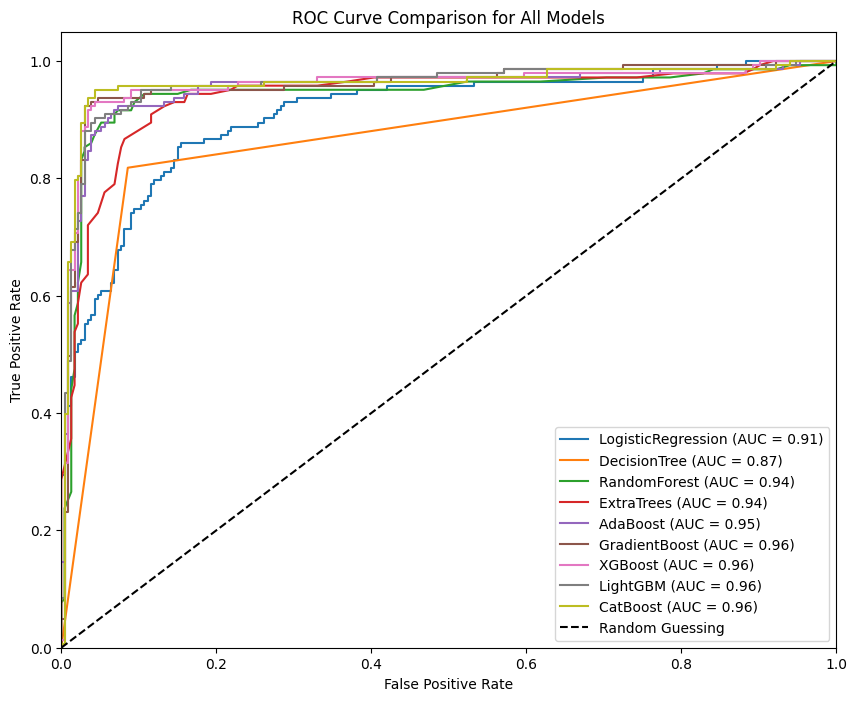

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve_comparison(results, X_test, y_test):
    """
    Plots ROC curves for all models that support predict_proba.
    
    Args:
        results (dict): Dictionary of model metrics, containing the trained models.
        X_test (pd.DataFrame): Test feature data.
        y_test (pd.Series): True labels for the test data.
    """
    plt.figure(figsize=(10, 8))
    
    # Loop through each model in the results dictionary
    for model_name, metrics in results.items():
        model = metrics.get('model')

        # Check if the model supports predict_proba
        if hasattr(model, "predict_proba"):
            # Get the predicted probabilities for the positive class
            y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            
            # Plot the ROC curve for this model
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Plot the baseline (random guessing)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    
    # Set plot labels and title
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison for All Models')
    plt.legend(loc="lower right")
    plt.show()

# Call the function to plot ROC curves
plot_roc_curve_comparison(results, X_test, y_test)
